### Przygotowanie danych

Kod został podzielony na dwie części, ponieważ SAS oferuje zaimplementowaną metodę imputacji wielokrotnej.
Natomiast niniejszy notatnik ma na celu przygotowanie danych do analizy właściwej.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

data = pd.read_csv(r'C:\Users\mjawo\Desktop\portfolio\google_app_store\googleplaystore.csv')

In [4]:
#proces czyszczenia i zmiany formatow danych w celu przygotowania zbioru do modelowania

#dla zmiennej Installs:
data.iloc[:,5] = data.iloc[:,5].str.replace('Free', '0')
data.iloc[:,5] = data.iloc[:,5].str.replace('+', "")
data.iloc[:,5] = data.iloc[:,5].str.replace(',', "")
data.iloc[:,5] = pd.to_numeric(data.iloc[:,5])

#dla zmiennej Reviews
data.iloc[:,3] = data.iloc[:,3].str.replace('3.0M', "3000000")
data.iloc[:,3] = pd.to_numeric(data.iloc[:,3])

#dla zmiennej Type (pozniej jako Free)
data.iloc[:,6] = data.iloc[:,6].str.replace('0', "Paid")

#dla zmiennej Rating
data = data[data['Rating'] != 19.0]

In [5]:
#usuwanie zbednych zmiennych (zbyt wiele unikalnych wartosci czy zduplikowanych informacji)
data = data.drop(columns=['App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Size', 'Price', 'Category',
                         'Content Rating'])

In [6]:
#kodowanie zmiennej Types (rezultat: zmienna Free)
types = pd.get_dummies(data['Type'])
data = pd.concat([data.drop(columns=['Type']), types], axis=1, join='outer')
data = data.drop(['Paid'], axis=1)

In [7]:
#zapisywanie nowego zbioru danych do CSV
data.to_csv(r'C:\Users\mjawo\Desktop\portfolio\google_app_store\modified_google.csv', index=False)

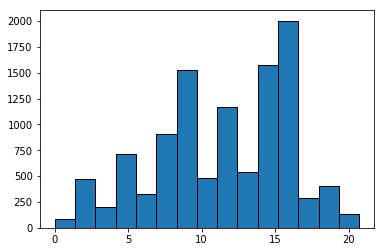

In [8]:
#transformacje logarytmiczne zmiennych ciągłych i tworzenie wykresów rozkładów
data['Installs'] = data['Installs'] + 1
data['Installs'] = data['Installs'].apply(np.log)
plt.hist(data['Installs'], bins = 15, edgecolor='black')
plt.show()

C:\Users\mjawo\.julia\conda\3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mjawo\.julia\conda\3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


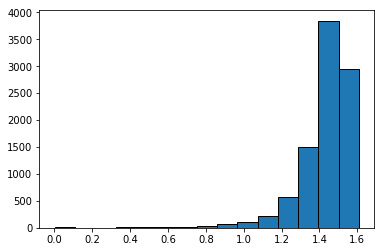

In [9]:
data['Rating'] = data['Rating'] + 0.001
data['Rating'] = data['Rating'].apply(np.log)
plt.hist(data['Rating'], bins = 15, edgecolor='black')
plt.show()

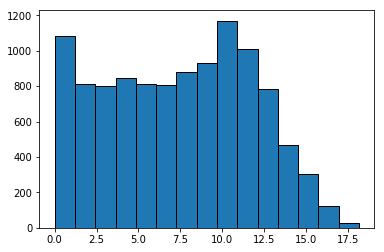

In [10]:
data['Reviews'] = data['Reviews'] + 1
data['Reviews'] = data['Reviews'].apply(np.log)
plt.hist(data['Reviews'], bins = 15, edgecolor='black')
plt.show()

In [12]:
#zbior z usunietymi missingami
no_miss = data.dropna()
data.to_csv(r'C:\Users\mjawo\Desktop\portfolio\google_app_store\log_google.csv', index=False)

In [13]:
#zbior z wypełnieniem mediana
med = data.fillna(data.median())
med.to_csv(r'C:\Users\mjawo\Desktop\portfolio\google_app_store\log_google_median.csv', index=False)